In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import lime
import lime.lime_tabular

In [3]:
df = pd.read_csv('datasets/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# It seems that there are many 0 values in the columns. Let's check the number of 0 values in each column.
columns_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_check].isin({0}).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [9]:
# There are many 0 values in the columns. Let's replace the 0 values with the mean of the respective columns.
for i in columns_check:
    df[i] = df[i].replace({0: df[i].mean()})

In [10]:
df[list].isin({0}).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
# There columns have many decimal places. Let's round the values to 2 decimal places.
new_data = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[new_data] = df[new_data].round(2)

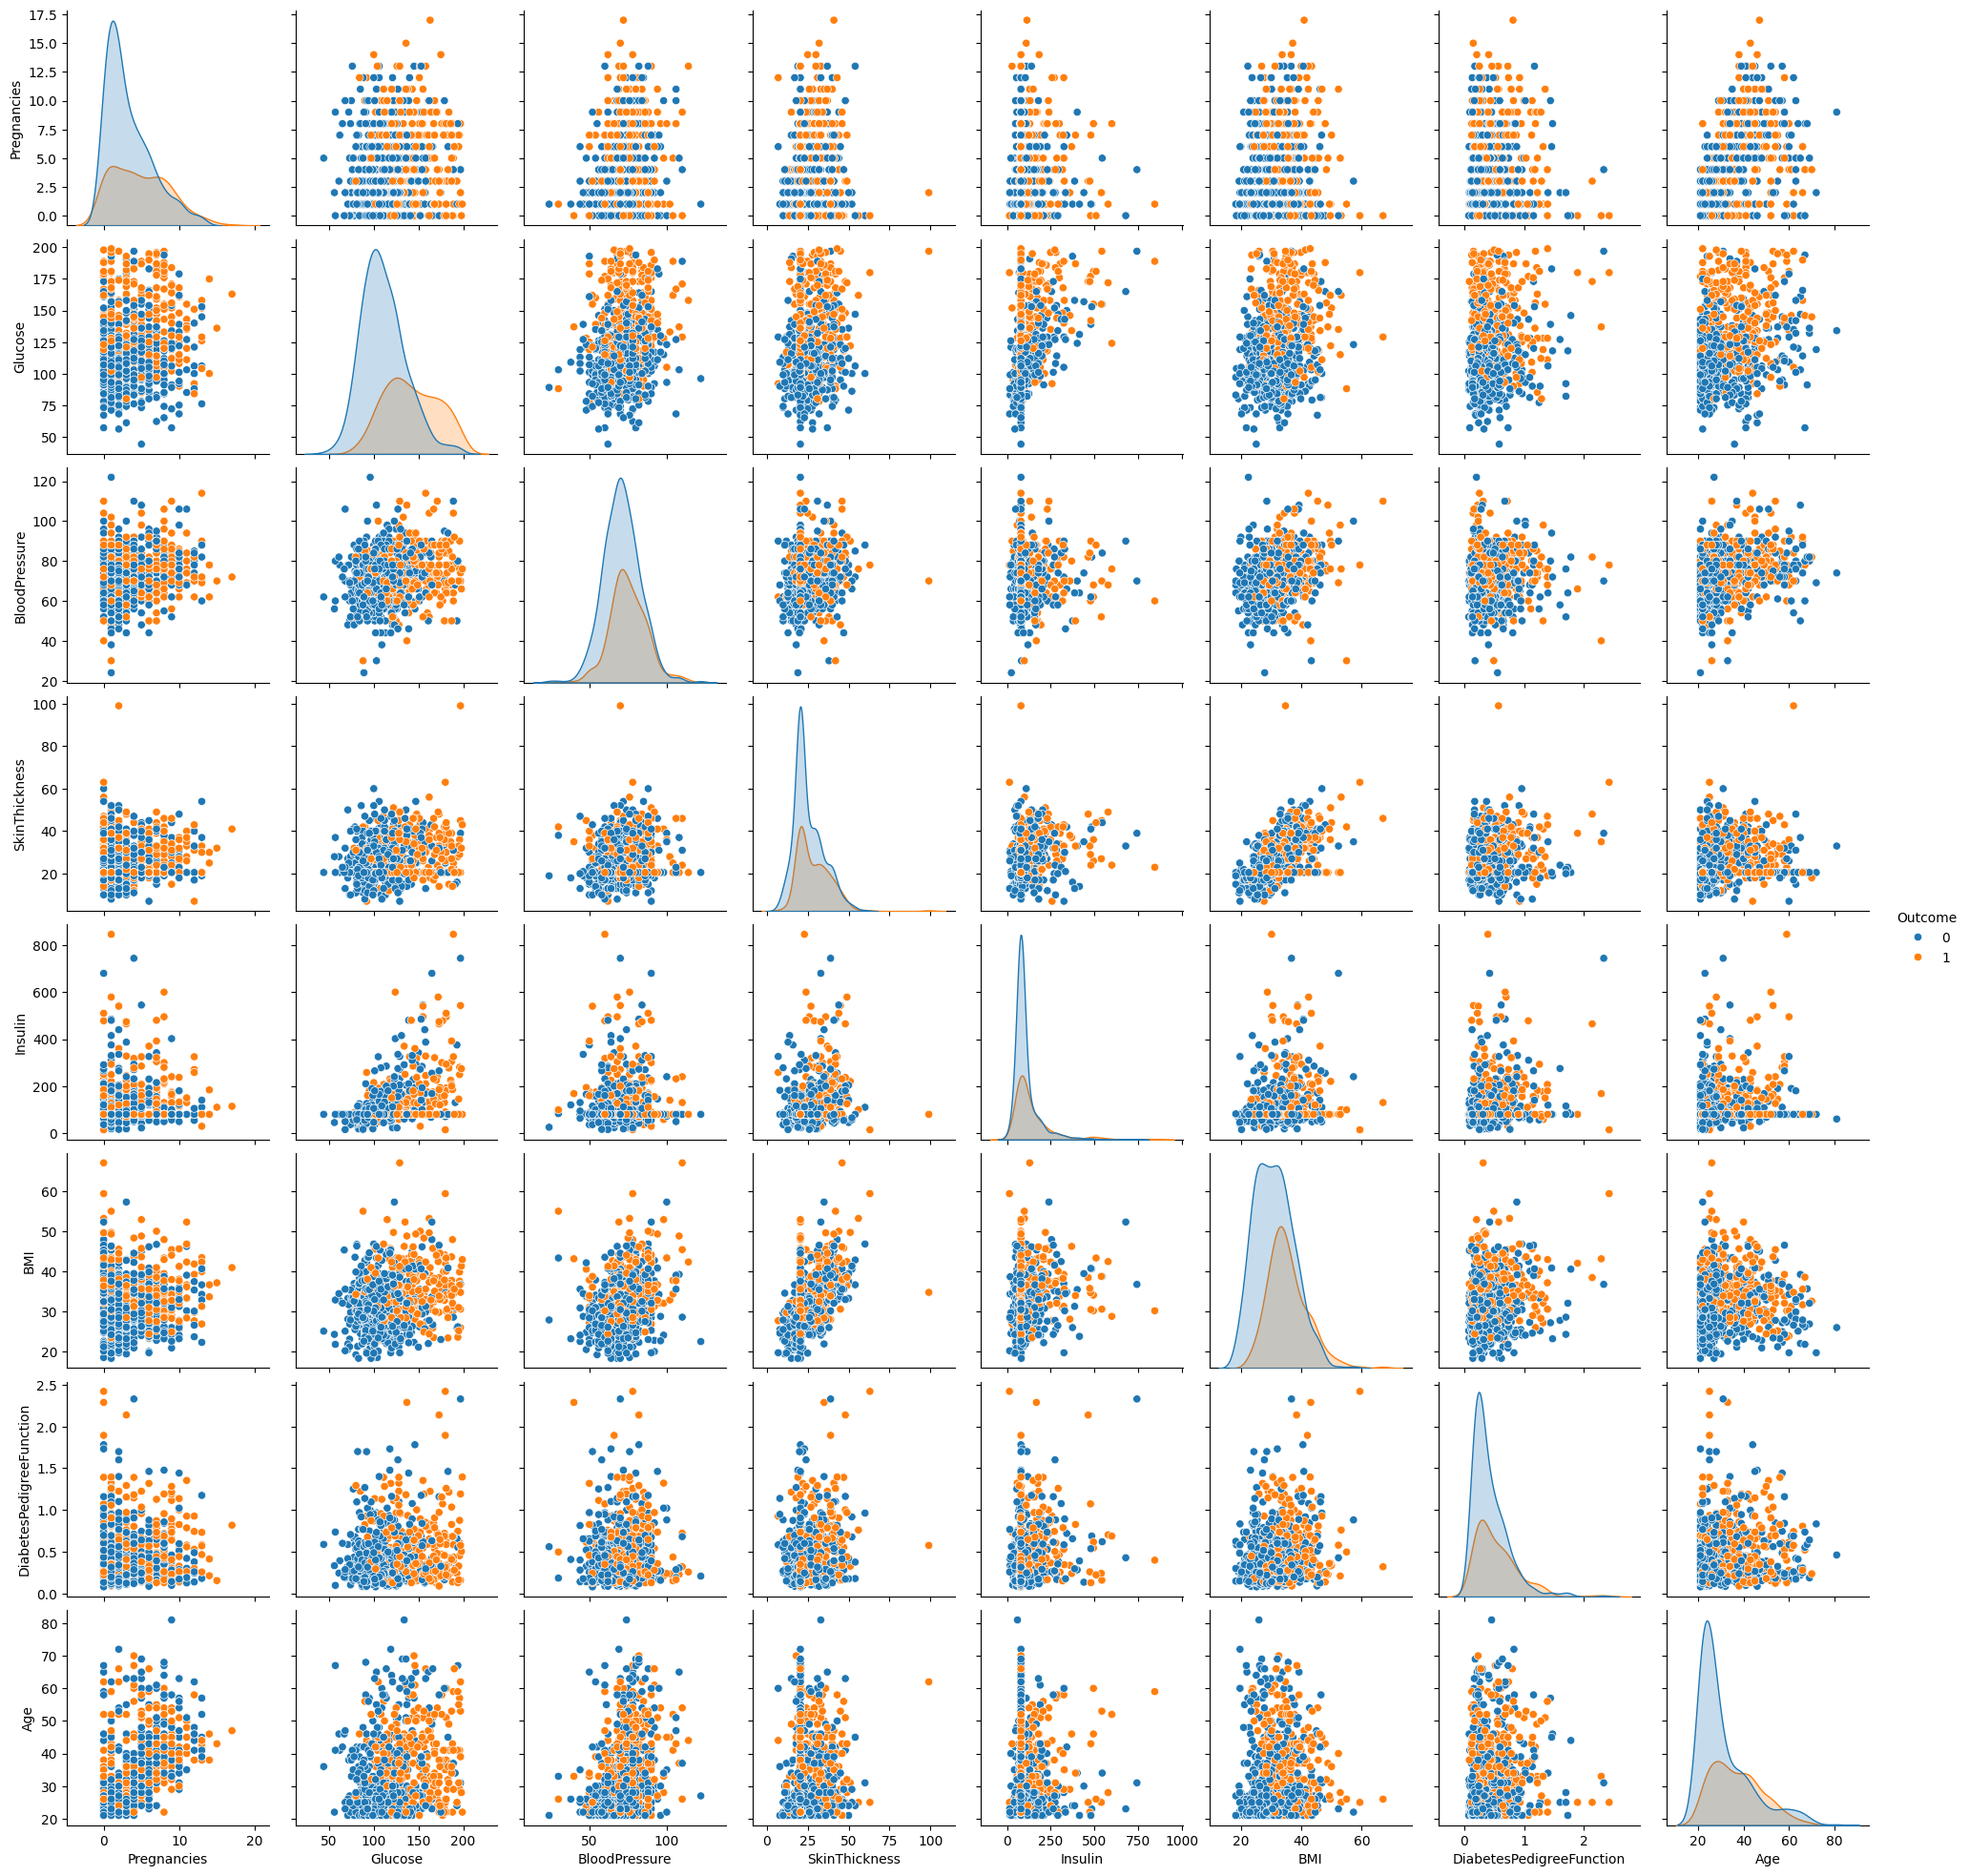

In [12]:
# Visualize the data, outcome is  hue
sns.pairplot(df, hue="Outcome")

## <span style="color: #20C997;">Personal Analysis</span>
Higher Glucose level is strong related to Diabetes and higher BMI is also related to Diabetes.<br>
Age and Pregnancies have positive impact on diabetes.


<Axes: xlabel='Outcome', ylabel='count'>

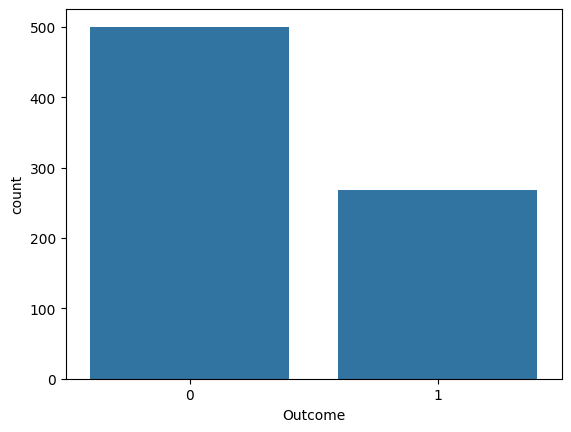

In [13]:
# Visualize the Outcome column
sns.countplot(x='Outcome', data=df)

<b> Outcome is imbalanced

<Axes: >

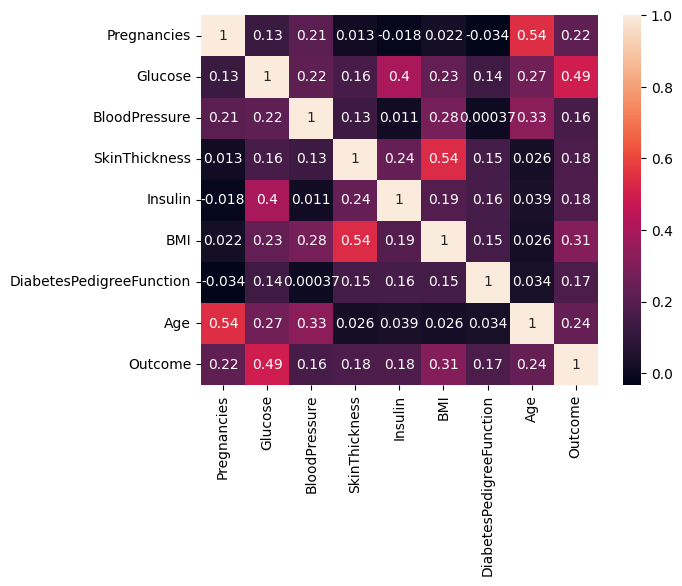

In [14]:
# Find the correlation between the columns
corr = df.corr()
sns.heatmap(corr, annot=True)

<p>Glucose is the most important feature for predicting diabetes.

<Axes: xlabel='Outcome', ylabel='Glucose'>

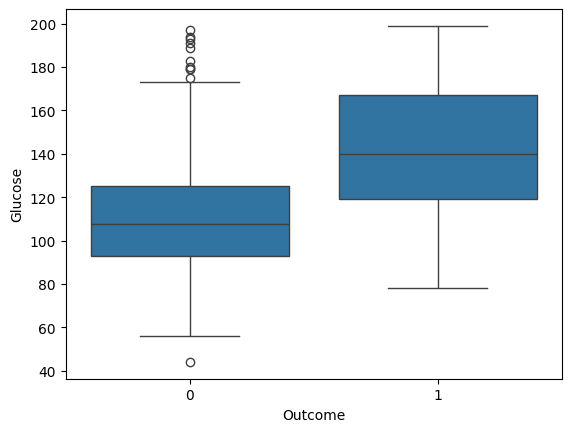

In [15]:
# Finding the relationship between Glucose and Diabetes
sns.boxplot(x='Outcome', y='Glucose', data=df)

## <span style="color: #20C997;">Personal Analysis</span>
As in Correlation matrix is showed, higher Glucose has is cause of diabetes.

<Axes: xlabel='Outcome', ylabel='Age'>

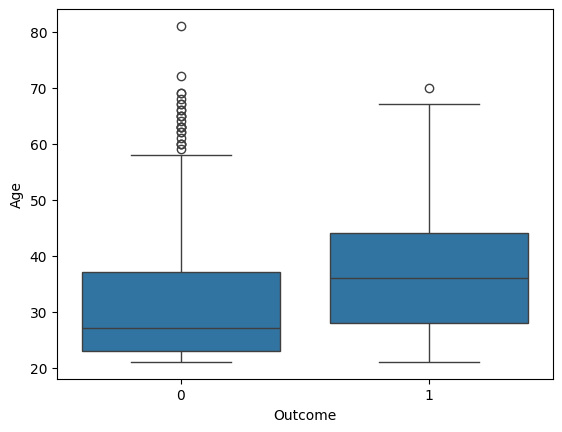

In [16]:
# Finding the relationship between Age and Diabetes
sns.boxplot(x='Outcome', y='Age', data=df)

## <span style="color: #20C997;">Personal Analysis</span>
Age effects on th outcome, but it is not huge.

<Axes: xlabel='Outcome', ylabel='BMI'>

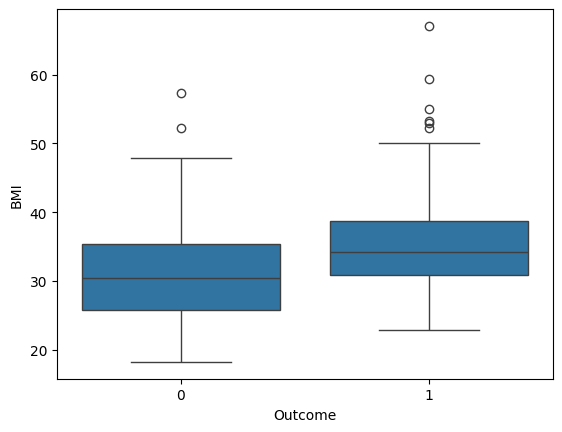

In [17]:
# Finding the relationship between BMI and Diabetes
sns.boxplot(x='Outcome', y='BMI', data=df)

## <span style="color: #20C997;">Personal Analysis</span>
BMI does not have significant role.

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

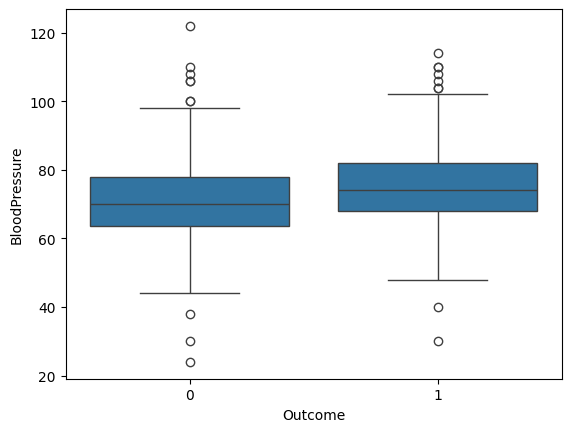

In [18]:
# Finding the relationship between BloodPressure and Diabetes
sns.boxplot(x='Outcome', y='BloodPressure', data=df)

<Axes: xlabel='Pregnancies', ylabel='Age'>

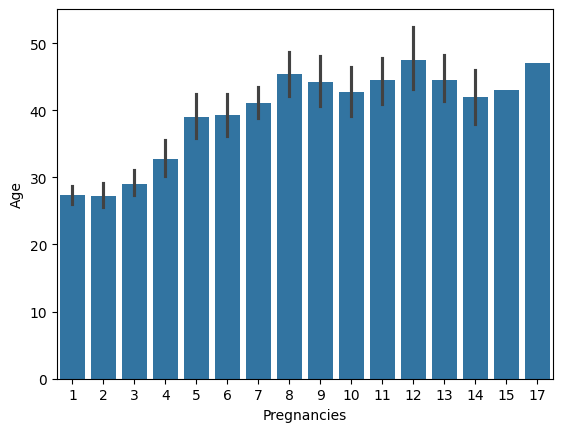

In [19]:
# Let's find the relationship between the number of pregnancies and age
df_filtered = df[df['Pregnancies'] > 0]
sns.barplot(x='Pregnancies', y='Age', data=df_filtered)

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

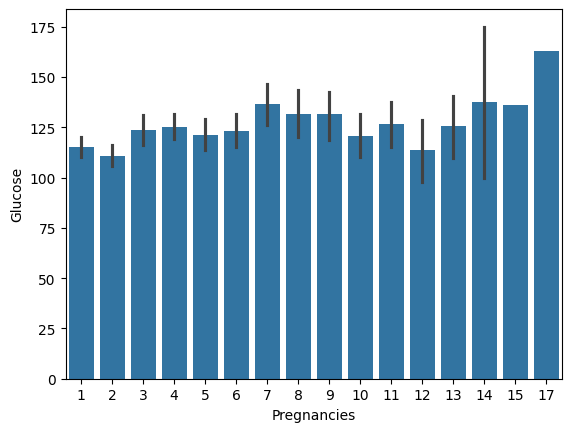

In [20]:
# Let's find the relationship between the number of pregnancies and Glucose level
df_filtered = df[df['Pregnancies'] > 0]
sns.barplot(x='Pregnancies', y='Glucose', data=df_filtered)

<Axes: xlabel='Age', ylabel='BMI'>

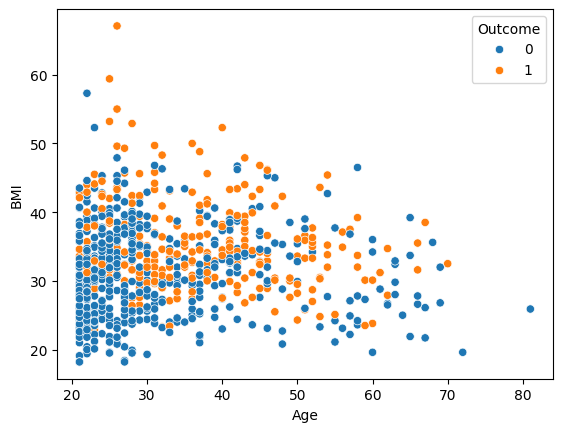

In [21]:
# Relationship Between Age and BMI
sns.scatterplot(x='Age', y='BMI', data=df, hue='Outcome')

<p>Preprocessing<b>

In [22]:
# Checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
Pregnancies,4
Glucose,0
BloodPressure,14
SkinThickness,12
Insulin,89
BMI,8
DiabetesPedigreeFunction,29
Age,9
Outcome,0


In [23]:
# Replacing the outliers with the mean value
imputer_mean = SimpleImputer(strategy='mean')
columns_outliers = outliers[outliers['Outliers'] > 0].index.tolist()

for col in columns_outliers:
    df[col] = df[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])
    df[col] = imputer_mean.fit_transform(df[[col]])


In [24]:
# Checking again the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [25]:
df[df['Outcome'] == 1]['Glucose'].min()

78.0

In [26]:
df[df['Outcome'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.843284,142.159627,74.883433,28.639104,117.225280,35.237985,0.531022,37.052239,1.0
std,3.681321,29.545967,11.601116,9.199605,49.915012,6.138686,0.311596,10.925826,0.0
min,0.000000,78.000000,40.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,20.540000,79.800000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,79.800000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,13.500000,199.000000,104.000000,49.190000,198.425000,50.250000,1.200000,66.500000,1.0


In [27]:
df[df['Outcome'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.70534,70.802180,25.317160,96.751300,30.861820,0.420264,31.135000,0.0
std,3.017185,24.71501,11.540059,8.857691,43.402936,6.440088,0.262928,11.477227,0.0
min,0.000000,44.00000,40.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.00000,63.500000,20.540000,79.800000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.50000,70.000000,21.000000,79.800000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.00000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.00000,104.000000,49.190000,198.425000,50.250000,1.200000,66.500000,0.0


## <span style="color: #20C997;">Personal Analysis</span>
It is very clear that Glucose and BMI have strong impact on diabetes, but I wanted to know the threshold level for Glucose and BMI, and age, that where the probability of getting diagnosed with diabetes get high.
Glucose's median for diabetes is 140 but for not diabetes is 107, and min for diabetes is 78 but for not diabetes is 44 which means if someone has lower 78, outcome is  not diabetes. For BMI is the same under 18.20 diabetes is negatives.

In [28]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [29]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

<Axes: xlabel='Outcome', ylabel='count'>

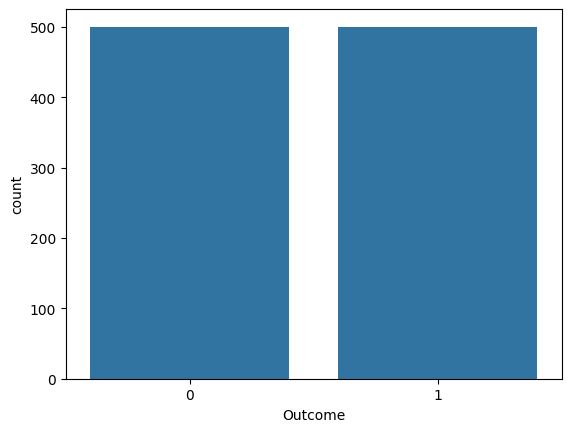

In [30]:
# Visualizing the data after SMOTE
sns.countplot(x=y)

In [31]:
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)  

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)

,Features,Score
1,Glucose,1878.21
4,Insulin,1135.46
7,Age,224.79
5,BMI,140.84
0,Pregnancies,102.23
3,SkinThickness,93.00
2,BloodPressure,41.31
6,DiabetesPedigreeFunction,11.52


In [32]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [33]:
# Check the VIF
X_df = pd.DataFrame(X, columns=df.drop('Outcome', axis=1).columns)
vif = pd.DataFrame()
vif["Features"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif

,Features,VIF
0,Pregnancies,1.44
1,Glucose,1.36
2,BloodPressure,1.26
3,SkinThickness,1.58
4,Insulin,1.38
5,BMI,1.59
6,DiabetesPedigreeFunction,1.06
7,Age,1.63


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

In [36]:
param_grid = [{
    'logistic__penalty': ['l1','l2'],
    'logistic__solver': ['saga'],
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__max_iter': [300]
}]

In [37]:
# Grid search
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [38]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.01, 0.1, 1, 10, 100],
                          'logistic__max_iter': [300],
                          'logistic__penalty': ['l1', 'l2'],
                          'logistic__solver': ['saga']}],
             scoring='accuracy', verbose=1)

In [39]:
train_score = grid_search.score(X_train, y_train)   

In [40]:
test_score = grid_search.score(X_test, y_test)

In [41]:
forecast = grid_search.predict(X_test)

In [42]:
print("Best Accuracy for Training Data: {:.2f}%".format(train_score * 100))
print("Test Accuracy for Testing Data: {:.2f}%".format(test_score * 100))
print("\nClassification Report:\n", classification_report(y_test, forecast))

Best Accuracy for Training Data: 73.71%
Test Accuracy for Testing Data: 76.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       149
           1       0.78      0.75      0.77       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



<Axes: xlabel='Predicted', ylabel='Actual'>

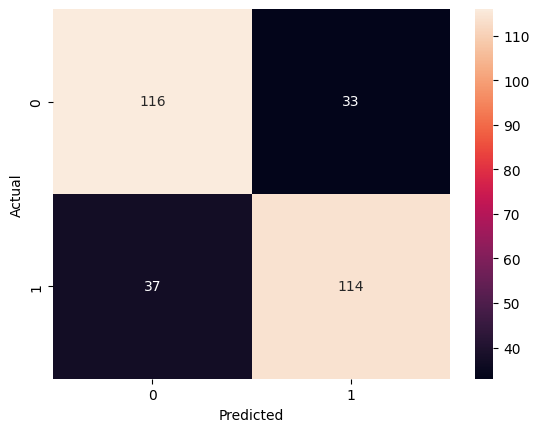

In [43]:
#  Visualize the confusion matrix
confusion = pd.crosstab(y_test, forecast, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion, annot=True, fmt="d",)

## <span style="color: #20C997;">Personal Analysis</span>
After playing lot with different parameters, there is no any different between result between hyperparameter optimization and actual training.<br>
It seems my dataset is too small and sample and Accuracy for Training Data is lower than Accuracy for Testing Data, which means my model is not overfitted.


In [44]:
logistic = LogisticRegression()

In [45]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [46]:
prediction = logistic.predict(X_test)

In [47]:
# This Confusion matrix is for the model evaluation before SMOTE
#report = classification_report(y_test, predictions)
#print(report)
#acc = accuracy_score(y_test, predictions)
#print("\n Model overall accuracy:{:.2f}%".format(acc * 100))

In [48]:
# Saving the classification report before the oversampling
#report_dict = classification_report(y_test, predictions, output_dict=True)
#report_df = pd.DataFrame(report_dict).transpose()
#report_df.to_csv('datasets/report.csv')

In [49]:
# loading the classification report  before the oversampling
report = pd.read_csv('datasets/report.csv')
report

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.79,0.81,0.80,151.00
1,1,0.63,0.60,0.62,80.00
2,accuracy,0.74,0.74,0.74,0.74
3,macro avg,0.71,0.71,0.71,231.00
4,weighted avg,0.74,0.74,0.74,231.00


## <span style="color: #20C997;">Personal Analysis</span>
Precision is 79%  for not diabetes but for diabetes is 63%.
Recall is higher for not diabetes than diabetes and F1 is bette for not diabetes. This is before the oversampling,

In [50]:
#  Visualize the confusion matrix
#confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
#sn.heatmap(confusion_matrix, annot=True)

In [51]:
# Save the confusion matrix
#confusion_matrix.to_csv('datasets/confusion_matrix.csv')

In [52]:
# Loading the confusion matrix 
confusion_matrix = pd.read_csv('datasets/confusion_matrix.csv', index_col=0)

,Actual,Predicted 0,Predicted 1
not diabetes,0,82,17
diabetes,1,19,36


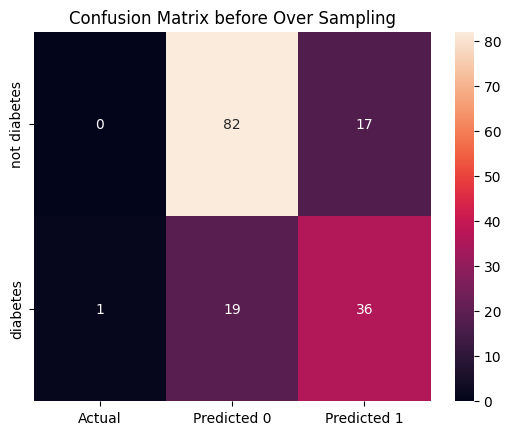

In [53]:
confusion_matrix = confusion_matrix.rename(index={0: 'not diabetes', 1: 'diabetes'})
ax = sns.heatmap(confusion_matrix, annot=True)
ax.set_title('Confusion Matrix before Over Sampling')
confusion_matrix

## <span style="color: #20C997;">Personal Analysis</span>
As I mentioned above, model works good for not-diabetes. I think this is because of being im balanced.
I think since the dataset quite small, it would be better to do oversampling

In [54]:
print(classification_report(y_test, prediction))
# get overall accuracy of the  model and fit it
acc = accuracy_score(y_test, prediction)
print("\n Model overall accuracy:{:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       149
           1       0.78      0.75      0.77       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300


 Model overall accuracy:76.67%


## <span style="color: #20C997;">Personal Analysis</span>
The model now performs more equitably across both classes after doing oversampling

<Axes: xlabel='Predicted', ylabel='Actual'>

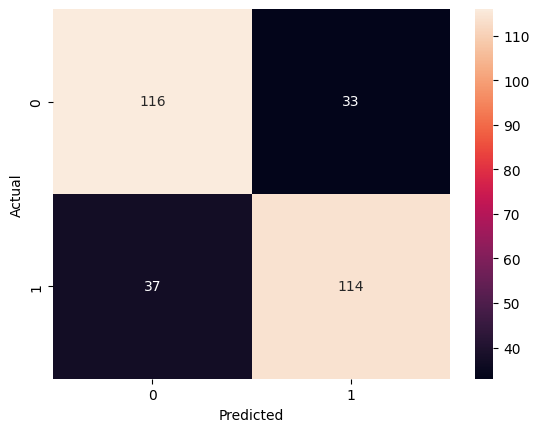

In [55]:
#  Visualize the confusion matrix
confusion = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion, annot=True, fmt="d",)

In [56]:
# Lett's get coefficients of the model
logistic.coef_ 

array([[ 0.41154801,  1.18257586, -0.18543732,  0.07386698, -0.13793107,
         0.62253377,  0.29930468,  0.27637806]])

In [57]:
logistic.intercept_

array([0.04789961])

## <span style="color: #20C997;">Personal Analysis</span>
After oversampling now model can predict better across both values.

In [58]:
# Trying a new data:
test = {
    "Pregnancies": [3],
    "Glucose": [85],
    "BloodPressure": [66],
    "SkinThickness": [32],
    "Insulin": [127],
    "BMI": [36],
    'DiabetesPedigreeFunction': [0.5],  
    "Age": [43]
}

test = pd.DataFrame(test)
test = sc.transform(test)

print("All probabilities by category:")
print(logistic.predict_proba(test))
print("**********************")

labels = ["Diabetes", "Not Diabetes"]

print("Outcome is:")
result = labels[int(logistic.predict(test)[0])]
print(result)

All probabilities by category:
[[0.73576289 0.26423711]]
**********************
Outcome is:
Diabetes


In [59]:
# Save the model and the scaler
joblib.dump(logistic, 'datasets/logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [60]:
joblib.dump(sc, 'datasets/scaler.pkl')

['scaler.pkl']

In [61]:
# Save the dataset
df.to_csv('datasets/diabetes_cleaned.csv', index=False)